Ковшик А.С., 201-361, вариант 5


# Математические методы обработки данных
## Выборочный метод. Первичная обработка экспериментальных данных
### Лабораторная работа №1&2

На одношпиндельном револьверном автомате изготовляются специальные ролики из пруткового материала. По данным фактических
измерений диаметров роликов в партии деталей, изготовленных методом автоматического получения размеров, были определены отклонения размера диаметра от номинального в мм.

Требуется исследовать выборку объема n=100, выбрав из таблицы полученных замеров подряд 100 чисел, начиная с номера 4N, где N – ваш порядковый номер в списке группы. В качестве интервалов группировки возьмите интервалы: (-3;-2], (-2;-1], ... , (2;3).

- Построить гистограмму, полигон, кумуляту;
- Определить характеристики отклонения ($\overline{x}$, $(S^2)^*$, $S^2$, $S$, $M_e$, $M_o$, $A$, $E$, $V$);
- Выдвинуть гипотезу о законе распределения исследуемого признака.


In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [48]:
dataStr = "0,414 0,011 0,666 -1,132 -0,410 -1,077 1,484 -0,340 0,789 -0,494 0,364 -1,237 -0,044 -0,111 -0,210 0,931 0,616 -0,377 -0,433 1,048 -0,037 0,759 0,609 -2,043 -2,290 0,404 -0,543 0,486 0,869 0,347 2,816 -0,464 -0,632 -1,614 0,372 -0,074 -0,916 1,314 -0,038 0,673 0,563 -0,107 0,131 -1,808 0,284 0,458 1,307 -1,625 -0,629 -0,504 -0,0056 -0,131 0,048 1,879 -1,016 0,360 -0,119 2,331 1,672 -1,053 0,840 0,246 -0,237 -1,312 1,603 -0,952 -0,566 1,600 0,465 1,951 0,110 0,251 0,116 -0,957 -0,190 1,479 -0,986 1,249 1,934 0,070 -1,358 -1,246 -0,959 -1,297 -0,722 0,925 0,783 -0,402 0,619 1,826 1,272 -0,945 0,494 0,050 -1,696 1,876 0,063 0,132 0,682 0,544 -0,417 -0,666 -0,104 -0,253 -2,543 -1,133 1,987 0,668 0,360 1,927 1,183 1,211 1,765 0,035 -0,359 0,193 -1,023 -0,222 -0,616 -0,060 -1,319 -0,785 -0,430 -0,298 0,248 -0,088 -1,379 0,295 -0,115 -0,621 -0,618 0,209 0,979 0,906 -0,096 -1,376 1,047 -0,872 -2,200 -1,384 1,425 -0,812 0,748 -1,095"
dataArr = np.array(dataStr.replace(",", ".").split(" ")).astype(float)

N = 5  # Порядковый номер в списке группы
# Выборка объема n=100, начиная с номера 4N, где N - порядковый номер в списке группы
# print(dataArr[4*N-1:4*N-1+100])
df = pd.DataFrame({'Отклонение': pd.Series(dataArr[4*N-1: 4*N-1+100])})
df.head()
# data.count() # Объем выборки


,Отклонение
0,1.048
1,-0.037
2,0.759
3,0.609
4,-2.043


In [36]:
# Интервалы группировки
interval_range = pd.interval_range(start=-3, end=3)

df['Интервал'] = pd.cut(df['Отклонение'],
                        bins=interval_range,
                        labels=[1, 2, 3])

df_grp = df.groupby('Интервал').count()
df_grp = df_grp.assign(Частость=df_grp.Отклонение / 100)
df_grp


,Отклонение,Частость
Интервал,,
"(-3, -2]",3,0.03
"(-2, -1]",12,0.12
"(-1, 0]",30,0.30
"(0, 1]",34,0.34
"(1, 2]",19,0.19
"(2, 3]",2,0.02


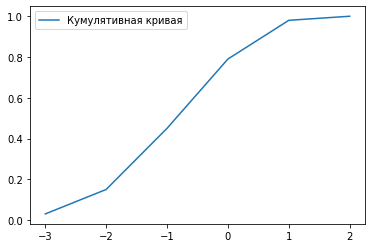

In [37]:
# Кумулятивная кривая (кумулята)
plt.plot(np.arange(-3, 3),
         df_grp['Частость'].cumsum(), label="Кумулятивная кривая")
plt.legend()


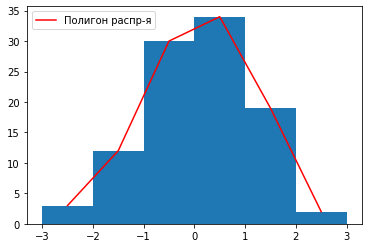

In [38]:
# Гистограмма и полигон распределения
plt.bar([rng.mid for rng in df_grp.index.values],
        df_grp['Отклонение'], width=1)
plt.plot([rng.mid for rng in df_grp.index.values],
         df_grp['Отклонение'], 'r', label="Полигон распр-я")
plt.legend()


Для расчета характеристик отклонения построим вспомогательную таблицу (DataFrame)

<img src="https://i.ibb.co/x8M4y71/image.png" alt="image" border="0">


In [39]:
dft = pd.DataFrame({'Second': [rng.mid for rng in df_grp.index.values],
                    'Third': df_grp['Отклонение'].values})
dft = dft.assign(Fourth=dft.Second * dft.Third)
mean = 1/dft['Third'].sum() * dft['Fourth'].sum()  # Выборочное среднее
dft = dft.assign(Fifth=dft.Second - mean)
dft = dft.assign(Sixth=dft.Fifth * dft.Fifth)
dft = dft.assign(Seventh=dft.Sixth * dft.Third)
dft = dft.assign(Eighth=dft.Seventh * dft.Fifth)
dft = dft.assign(Nineth=dft.Eighth * dft.Fifth)
# dft.loc['Сумма',:]= dft.sum(axis=0)
dft


,Second,Third,Fourth,Fifth,Sixth,Seventh,Eighth,Nineth
0,-2.5,3,-7.5,-2.6,6.76,20.28,-52.728,137.0928
1,-1.5,12,-18.0,-1.6,2.56,30.72,-49.152,78.6432
2,-0.5,30,-15.0,-0.6,0.36,10.80,-6.480,3.8880
3,0.5,34,17.0,0.4,0.16,5.44,2.176,0.8704
4,1.5,19,28.5,1.4,1.96,37.24,52.136,72.9904
5,2.5,2,5.0,2.4,5.76,11.52,27.648,66.3552


Для вычисления эмпирических характеристик – оценок генеральных числовых характеристик случайной величины воспользуемся формулами:

<img src="https://i.ibb.co/mqXKdQX/image.png" alt="image" border="0">


In [40]:
# (1.1) Выборочное среднее
mean = 1/dft['Third'].sum() * dft['Fourth'].sum()
# (1.2) Дисперсия
var = 1/dft['Third'].sum() * dft['Seventh'].sum()
# (1.5) Третий центральный момент
m3 = 1/dft['Third'].sum() * dft['Eighth'].sum()
# (1.6) Четвертый центральный момент
m4 = 1/dft['Third'].sum() * dft['Nineth'].sum()
# Введем поправку для эмпирической дисперсии, вычислив несмещенную эмпирическую дисперсию:
# (1.9) Несмещенная эмпирическая дисперсия
evar = (dft['Third'].sum()/(dft['Third'].sum() - 1)) * var
# (1.3) Среднее квадратическое отклонение
std = var ** (0.5)  
# Выборочное среднее квадратическое отклонение
estd = evar ** (0.5)  


Мода $М_о$ – значение случайной величины, для которой вероятность
(плотность распределения) максимальна. Для группированного распределения
Мо вычисляется по формуле:

$$M_o = L + i\frac{f_{mo}-f_{mo-1}}{(f_{mo}-f_{mo-1})+(f_{mo}-f_{mo+1})},$$

где $L$- нижняя граница модального интервала, $i$- величина модального интервала, $f_{mo}$, $f_{mo-1}$, $f_{mo+1}$ частота модального, предшествующего модальному и следующего за модальным интервала. Выбираем в качестве начала интервала 0, так как именно на этот интервал приходится наибольшее количество. Имеем:


In [49]:
mode = 0 + 1 * ((34-30)/((34-30)+(34-19)))
mode


0.21052631578947367

Наиболее часто встречающееся значение ряда – 0.211.

Для вычисления медианы группированного распределения
воспользуемся формулой:

$$M_e = L + i(\frac{\frac{n}{2} - F}{f}),$$

где $L$ – нижняя граница интервала, в котором находится медиана (медианный
интервал),
$i$ – величина медианного интервала,
$n$- объем выборки,
$f$- частота медианного интервала,
$F$- накопленная частота интервала, предшествующему медианному. Медианным является интервал 0 - 1, т.к. в этом интервале накопленная частота, больше медианного номера. Имеем:


In [43]:
median = 0 + 1 * (((dft['Third'].sum())/2 - 45)/34)
median


0.14705882352941177

Таким образом, 50% единиц совокупности будут меньше по величине 0.147.

В симметричных рядах распределения значение моды и медианы совпадают со средней величиной $(\overline{x}=M_e=M_o)$, а в умеренно асимметричных они соотносятся таким образом: $3(\overline{x}-M_e) ≈ \overline{x}-M_o$.
В нашем случае $-0.141 ≈ -0.111$


In [44]:
a = m3 / (estd ** (3))  # (1.7) Коэффициент асимметрии
e = m4 / (estd ** (4))  # (1.8) Эксцесс
v = estd / mean  # (1.4) Коэффициент вариации


In [45]:
params = {'Математическое ожидание': mean,
          'Дисперсия': var,
          'Третий центральный момент': m3,
          'Четвертый центральный момент': m4,
          'Несмещенная эмпирическая дисперсия': evar,
          'Среднее квадратическое отклонение': std,
          'Выборочное среднее квадратическое отклонение': estd,
          'Медиана': median,
          'Мода': mode,
          'Коэффициент асимметрии': a,
          'Эксцесс': e,
          'Коэффициент вариации': v
          }
for key, val in params.items():
    print(f'{key} = {val}')


Математическое ожидание = 0.1
Дисперсия = 1.16
Третий центральный момент = -0.2640000000000004
Четвертый центральный момент = 3.5984000000000003
Несмещенная эмпирическая дисперсия = 1.1717171717171717
Среднее квадратическое отклонение = 1.0770329614269007
Выборочное среднее квадратическое отклонение = 1.0824588545146516
Медиана = 0.14705882352941177
Мода = 0.21052631578947367
Коэффициент асимметрии = -0.2081467982712472
Эксцесс = 2.6209808561236625
Коэффициент вариации = 10.824588545146515


По виду полигона (гистограммы и кумуляты), а так же по значениям оценок генеральных характеристик, можно предположить, что полученное распределение математически может быть описано законом нормального распределения $X = N(0.1;1.082)$. Проверка выдвинутого предположения (гипотезы) будет рассмотрена в следующей лабораторной работе.
